<a href="https://colab.research.google.com/github/safdarjung/saf/blob/main/Implementation_of_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Implementation of Linear Regression Model***

Model takes multiple independent input variables and outputs dependent variables that depends on the input data

y = wx + b
y=output, x=input, w=weights, b=bias

this is an equation of a line, the model provides a line that best fits the datapoints, this algorithm is used when the relation between the input and the output variables is linear.
 The best fit line is found by comparing the model output with the ground truth during the model training phase.
 model training phase, the error or loss function is created that is used to adjust the value of the weights and the bias to fit the ground truth as similar as possible(although we do not want to fit the model exactly, we want a general model that could regress the similar output data based on the provided input variables)
 LOSS FUNC = MeanSquareError = j(w,b) = 1/N[(y-(wx+b))^2]
 we calc MSE for each datapoint in the dataset, then divide it with the no. of datapoints.
 Our objective is to minimise the loss function, by adjusting the values of weights and biases.
 to minimise we calculate the gradient/ derivative of the loss func wrt w and b, the apply the method of Gradient Decent.
 Gradient Decent, calc the gradient tells us if the slope is negative or positive, we want to move towards the global minima of the function, so we subtract some value from the weights and biases to advance towards the minima. the subtraction value is calculate as w = w-a*dw
                                               b = b-a.db
                                               a = learning rate,
                                               db and dw = derivatives
All the calculations are done using matrix operations  

In [1]:

import numpy as np

class LinearRegression:
  def __init__(self,lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

  def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
          y_predicted = np.dot(X, self.weights) + self.bias
          dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
          db = (1/n_samples) * np.sum(y_predicted - y)

          self.weights = self.weights - self.lr * dw
          self.bias = self.bias - self.lr * db

  def predict(self,X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

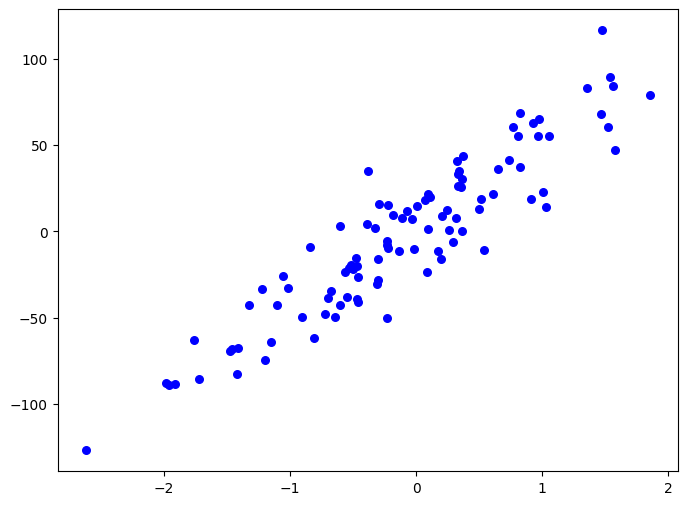

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y,color='b',marker='o',s=30)
plt.show()

In [3]:
LinearRegression = LinearRegression(lr=0.01)
LinearRegression.fit(X_train,y_train)
predicted = LinearRegression.predict(X_test)

def mse(y_test,predicted):
  return np.mean((y_test-predicted)**2)

mse_value = mse(y_test,predicted)
print(mse_value)

220.02388898430726


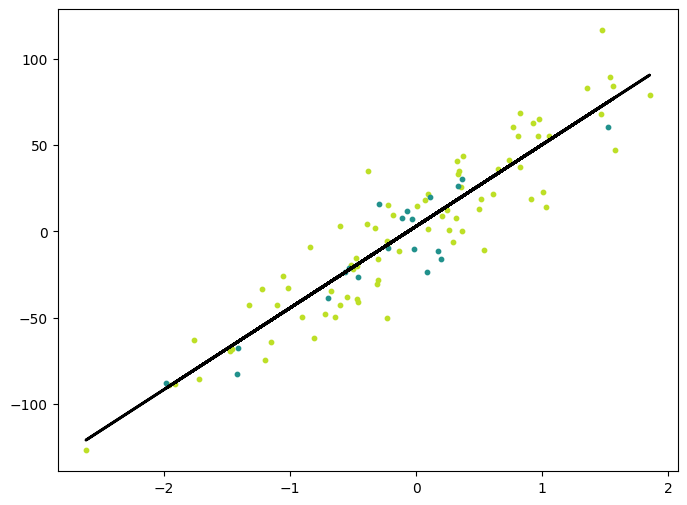

In [4]:
y_pred_line = LinearRegression.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X,y_pred_line,color='black',linewidth=2,label='Prediction')
plt.show()

***Logistic Regression Implementation***

the equation is y = 1/(1+e^(-wx+b))
                y = 1/(1+e^(-x))   -----> Sigmoid Function

Logistic Regression outputs the probability value between 0 and 1.
It models the probability that a given input point belongs to a particular class.
LOSS FUNC = crossEntropy = 1/N [ylog(y') + (1-y)log(1-y')]

crossEntropy is a loss function commonly used in classification problems.It measures the difference between two probability distributions.

Here also, we use Gradient Descent to minimise the loss function


In [7]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

class LogisticRegression:
  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      linear_pred = np.dot(X,self.weights) + self.bias
      y_predicted = sigmoid(linear_pred)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db


  def predict(self,X):
    linear_pred = np.dot(X,self.weights) + self.bias
    y_predicted = sigmoid(linear_pred)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [9]:
data = datasets.load_breast_cancer()
X,y = data.data, data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred,y_test):
  return np.sum(y_pred==y_test)/len(y_test)           # how many times y_pred==y_test divide the number by no.of y_test

acc = accuracy(y_pred,y_test)
print(acc)







<ipython-input-7-6e3a9a85135a>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.9210526315789473


**Decision Trees**

Entropy=-∑plog(p)
p = class1/totalPoints

Information gain = Entropy(parent)-[weighted avg]*Entropy(children)
 Information gain measures the reduction in entropy after a dataset is split based on a feature. It is calculated as the difference between the entropy of the original dataset and the weighted sum of the entropies of the subsets created by the split.

Feature Selection: At each node, the algorithm selects the feature that best splits the data. This is based on measures like Gini impurity, entropy (for classification), or mean squared error (for regression).

Splitting: The selected feature divides the dataset into subsets. The goal is to create child nodes that are as pure as possible, meaning they contain data points that are more similar to each other in terms of the target variable.

Stopping Criteria: The splitting process continues until a stopping criterion is met, such as reaching a maximum tree depth, having a minimum number of samples per leaf, or achieving a node with pure samples.

Prediction: For a new data point, the tree is traversed from the root to a leaf node by making decisions at each node based on the feature values of the data point. The leaf node reached provides the predicted class label (in classification) or value (in regression).

In [26]:
from collections import Counter

class Node:
  def __init__(self,feature=None,threshold=None,left=None,right=None,*,value=None):     # using * we have to pass the value parameter by refernce like value=100
    self.feature=feature
    self.threshold=threshold
    self.left=left
    self.right=right
    self.value=value

  def is_leaf_node(self):
    return self.value is not None

class DecisionTree:
  def __init__(self,min_samples_split=2,max_depth=100,n_features=None):
    self.min_samples_split=min_samples_split
    self.max_depth=max_depth
    self.n_features=n_features
    self.root=None

  def fit(self,X,y):
    self.n_features=X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
    self.root=self._grow_tree(X,y)

  def _grow_tree(self,X,y,depth=0):
    n_samples,n_feats=X.shape
    n_labels=len(np.unique(y))

    # checking the stopping criteria
    if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
      leaf_value=self._most_common_label(y)
      return Node(value=leaf_value)

    feat_idx=np.random.choice(n_feats,self.n_features,replace=False)
    # if stopping criteria is not met, then we split using best split
    best_feature,best_thresh=self._best_split(X,y,feat_idx)
    # create child nodes
    left_idx,right_idx=self._split(X[:,best_feature],best_thresh)
    left = self._grow_tree(X[left_idx,:],y[left_idx],depth+1)
    right = self._grow_tree(X[right_idx,:],y[right_idx],depth+1)

    return Node(best_feature,best_thresh,left,right)

  def _best_split(self,X,y,feat_idx):
      best_gain=-1
      split_idx,split_thresh=None,None

      for feat in feat_idx:
        X_column=X[:,feat]
        thresholds=np.unique(X_column)
        for thresh in thresholds:
          #calc Information Gain
          gain=self._information_gain(y,X_column,thresh)
          if gain>best_gain:
            best_gain=gain
            split_idx=feat
            split_thresh=thresh
      return split_idx,split_thresh

  def _information_gain(self,y,X_column,threshold):
      #parent entropy
      parent_entropy=self._entropy(y)
      #create children
      left_idxs,right_idxs=self._split(X_column,threshold)
      if len(left_idxs)==0 or len(right_idxs)==0:
        return 0
      #weighted avg of entropy of children
      n = len(y)
      n_l,n_r = len(left_idxs),len(right_idxs)
      e_l,e_r = self._entropy(y[left_idxs]),self._entropy(y[right_idxs])
      child_entropy= (n_l/n) *e_l +(n_r/n)*e_r
      #Information_gain
      information_gain = parent_entropy - child_entropy
      return information_gain

  def _split(self,X_column,split_thresh):
      left_idxs=np.argwhere(X_column<=split_thresh).flatten()
      right_idxs=np.argwhere(X_column>split_thresh).flatten()
      return left_idxs,right_idxs


  def _entropy(self,y):
      hist=np.bincount(y)
      ps=hist/len(y)
      return -np.sum([p*np.log(p) for p in ps if p>0])

  def _most_common_label(self,y):
    counter=Counter(y)
    most_common=counter.most_common(1)[0][0]
    return most_common

  def predict(self,X):
    return np.array([self._traverse_tree(x,self.root) for x in X])

  def _traverse_tree(self,x,node):
    if node.is_leaf_node():
      return node.value

    if x[node.feature]<=node.threshold:
      return self._traverse_tree(x,node.left)
    return self._traverse_tree(x,node.right)








In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)

0.9210526315789473
